In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coleridgeinitiative-show-us-the-data/sample_submission.csv
/kaggle/input/coleridgeinitiative-show-us-the-data/train.csv
/kaggle/input/coleridgeinitiative-show-us-the-data/test/8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60.json
/kaggle/input/coleridgeinitiative-show-us-the-data/test/2100032a-7c33-4bff-97ef-690822c43466.json
/kaggle/input/coleridgeinitiative-show-us-the-data/test/2f392438-e215-4169-bebf-21ac4ff253e1.json
/kaggle/input/coleridgeinitiative-show-us-the-data/test/3f316b38-1a24-45a9-8d8c-4e05a42257c6.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/f8b03c87-9d1a-4f20-b76b-cb6c69d447b2.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/585ba241-6348-41ce-a5d2-c9ee434cd64d.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/bde73ad6-ce46-489b-8ee0-b162698cc6df.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/c7ce1ac6-36e4-4258-b2e4-1b525dc82ad5.json
/kaggle/input/coleridgeinitiative-show-us-the-data/train/9d75e205-3030-44c6-ae

# Libraries

In [49]:
import pandas as pd
import numpy as np
import random
import time
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import re
import json
from tqdm.autonotebook import tqdm
import string
import collections
from textblob import TextBlob

import spacy

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import utils
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [50]:
#define stopwords
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

# OBTAIN

In [51]:
#read train data
train_df = pd.read_csv('../input/flatiron-capstone-project/train_df.csv', index_col = 0)
train_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label,text,sentiment
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,the impact of dual enrollment on college degre...,national education longitudinal study,National Education Longitudinal Study,national education longitudinal study,this study used data from the national educati...,0.041849
1,2f26f645-3dec-485d-b68d-f013c9e05e60,educational attainment of high school dropout ...,national education longitudinal study,National Education Longitudinal Study,national education longitudinal study,dropping out of high school is not necessarily...,0.077153
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,difference in outcome for female and male stud...,national education longitudinal study,National Education Longitudinal Study,national education longitudinal study,stress satisfactory outcome for all youth incl...,0.114600
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,stepping stone and option value in a model of ...,national education longitudinal study,National Education Longitudinal Study,national education longitudinal study,federal reserve bank of richmond s1 accounting...,0.047667
4,c754dec7-c5a3-4337-9892-c02158475064,parental effort school resource and student ac...,national education longitudinal study,National Education Longitudinal Study,national education longitudinal study,this article investigates an important factor ...,0.076616


In [52]:
#read submission data
submission_df = pd.read_csv('../input/flatiron-capstone-project/submission.csv', index_col = 0)
submission_df.head()

,Id,PredictionString,text
0,2100032a-7c33-4bff-97ef-690822c43466,NaN,Cognitive deficits and reduced educational ach...
1,2f392438-e215-4169-bebf-21ac4ff253e1,NaN,This report describes how the education system...
2,3f316b38-1a24-45a9-8d8c-4e05a42257c6,NaN,"Cape Hatteras National Seashore (CAHA), locate..."
3,8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60,NaN,A significant body of research has been conduc...


Now, our job is to fill in the column 'PredictionString' with cleaned_label that matches the given text.

# CLASSIFIERS: RandomForestClassifier, SVC, MultinomialNB

## Preprocessing

Preprocessing text data is a bit more challenging that working with more traditional data types because there's no clear-cut answer for exactly what sort of preprocessing and cleaning we need to do. Before we can begin cleaning and preprocessing our text data, we need to make some decisions about things such as:

* Do we remove stop words or not?
* Do we stem or lemmatize our text data, or leave the words as is?
* Is basic tokenization enough, or do we need to support special edge cases through the use of regex?
* Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?
* Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?
* What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?

### Count Vectorization

Machine Learning algorithms don't understand strings. However, they do understand math, which means they understand vectors and matrices. By Vectorizing the text, we just convert the entire text into a vector, where each element in the vector represents a different word. The vector is the length of the entire vocabulary -- usually, every word that occurs in the English language, or at least every word that appears in our corpus. Any given sentence can then be represented as a vector where all the vector is 1 (or some other value) for each time that word appears in the sentence.

### TD-IDF Vectorization

TD-IDF is short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

**Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.**

# Preprocessing

TFIDFVectorizer (Term Frequency-Inverse Document Frequency) is used to convert a collection of raw documents to a matrix of TF-IDF features. It will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. 

OneHotEncoding will encode categorical features as a one-hot numeric array.

The data in the dataset is in the textual format which needs conversion to numeric format.

We need to combine the outputs of TFIDFVectorizer and OneHotEncoder without which we will not be able to train the model. To overcome the problem of combining two different results (TFIDF features and one-hot numeric array) we will use the ColumnTransformer from the Sklearn Library. The ColumnTransformer combines both outputs and it will return the final output as csr_matrix.

### Train-Test-Split

In [53]:
from sklearn.model_selection import train_test_split

X = train_df['dataset_title'].to_numpy()
y = train_df['cleaned_label'].to_numpy()

In [54]:
#split traing data into training a validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Vectorize Features

In [55]:
#https://developers.google.com/machine-learning/guides/text-classification/step-3

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#limit on the length of text sequences. Sequences longer than this will be truncated
max_sequence_length = 500

#get max sequence length
max_length = len(max(X_train, key = len))
if max_length > max_sequence_length:
    max_length = max_sequence_length
    
max_vocab_length = 20000 # max number of words to have in our vocabulary

#limit on the number of features. We use the top 20K features
top_k = 20000

vectorizer = TfidfVectorizer(min_df = 1,                       #ignore terms that have a document frequency strictly lower than the given threshold
                             #max_features = max_length,       #build a vocabulary that only consider the top max_features ordered by term frequency
                             dtype = 'int32', 
                             strip_accents = 'unicode',
                             analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             ngram_range = (1, 4), 
                             use_idf = 1,                      #enable inverse-document-frequency reweighting
                             smooth_idf = 1,                   #weights by adding one to document frequencies
                             sublinear_tf = 1,                 #apply sublinear tf scaling
                             stop_words = stopwords_list)

#learn vocabulary from training texts and vectorize training texts
vectorizer = vectorizer.fit(list(X_train) + list(X_test))

#transform Bag-of-Words textual data to numeric
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [56]:
vectorizer.get_feature_names()

['adni',
 'adult',
 'adult competency',
 'advanced',
 'advanced national',
 'advanced national seismic',
 'advanced national seismic system',
 'agid',
 'aging',
 'aging blsa',
 'aging genetics',
 'aging genetics alzheimers',
 'aging genetics alzheimers disease',
 'aging integrated',
 'aging integrated database',
 'aging integrated database agid',
 'agricultural',
 'agricultural resource',
 'agricultural resource management',
 'agricultural resource management survey',
 'agriculture',
 'alzheimers',
 'alzheimers disease',
 'alzheimers disease data',
 'alzheimers disease data storage',
 'alzheimers disease neuroimaging',
 'alzheimers disease neuroimaging initiative',
 'american',
 'american breeding',
 'american breeding bird',
 'american breeding bird survey',
 'analysis',
 'analysis program',
 'analytics',
 'analytics platform',
 'analytics platform registry',
 'analytics platform registry jhcrown',
 'ans',
 'ans comprehensive',
 'ans comprehensive catalog',
 'ans comprehensive catalog

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#select top 'k' of the vectorized features, limit on the number of features. We use the top 20K features
top_k = 20000

selector = SelectKBest(f_classif, k = min(top_k, X_train.shape[1]))
selector.fit(X_train, y_train)
X_train = selector.transform(X_train).astype('float32')
X_test = selector.transform(X_test).astype('float32')

### Encode Label

In [58]:
from sklearn import preprocessing

#use the LabelEncoder to convert text labels to integers, 0, 1, 2, etc.
encoder = preprocessing.LabelEncoder()

#since we have two different data set (X_train and X_test), 
#we need to fit it on all of our data otherwise there might be some categories in the test set X_test that were not in the train set X_train 
#and we will get errors
encoder.fit(list(y_train) + list(y_test)) 
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [59]:
encoder.classes_

array(['2019 ncov complete genome sequences', '2019 ncov genome sequence',
       '2019 ncov genome sequences', 'adni',
       'advanced national seismic system anss comprehensive catalog comcat ',
       'advanced national seismic system comprehensive catalog',
       'aging integrated database', 'aging integrated database agid ',
       'agricultural resource management survey',
       'agricultural resources management survey',
       'alzheimer s disease neuroimaging initiative adni ',
       'alzheimers disease neuroimaging initiative',
       'anss comprehensive catalog',
       'anss comprehensive earthquake catalog',
       'arms farm financial and crop production practices',
       'baccalaureate and beyond',
       'baccalaureate and beyond longitudinal study',
       'baltimore longitudinal study of aging',
       'baltimore longitudinal study of aging blsa ',
       'beginning postsecondary student',
       'beginning postsecondary students',
       'beginning postsecondary

## Random Forest

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

#create a tokenization a modelling pipeline
RandomForestClassifier_model = RandomForestClassifier(n_estimators = 100, random_state = 123) #model the text

#fit the pipeline to the training data
RandomForestClassifier_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [61]:
#predict 
RandomForestClassifier_yhat_train = RandomForestClassifier_model.predict(X_train)
RandomForestClassifier_yhat_test = RandomForestClassifier_model.predict(X_test)

#train accuracy 
RandomForestClassifier_train_accuracy = accuracy_score(y_train, RandomForestClassifier_yhat_train) * 100
print('Train accuracy: {0}'.format(RandomForestClassifier_train_accuracy))

#test accuracy 
RandomForestClassifier_test_accuracy = accuracy_score(y_test, RandomForestClassifier_yhat_test) * 100
print('Test accuracy: {0}'.format(RandomForestClassifier_test_accuracy))

Train accuracy: 74.57400813835199
Test accuracy: 74.57411645054665


In [62]:
from sklearn.model_selection import KFold, cross_val_score

#get cross validation to make sure model has gotten most of the patterns from the data correctly, 
#and its not picking up too much on the noise
k_fold = KFold(n_splits = 5)
RandomForestClassifier_CV = cross_val_score(RandomForestClassifier_model, X_train, y_train, 
                                            cv = k_fold, scoring = 'accuracy', n_jobs=-1).mean()
RandomForestClassifier_CV

0.745167912012832

In [63]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

#get classification report
print('Model: RandomForestClassifier', '\n', classification_report(y_test, RandomForestClassifier_yhat_test))

Model: RandomForestClassifier 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.58      1.00      0.74       709
           4       0.00      0.00      0.00         2
           8       0.94      1.00      0.97       127
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00       487
          11       0.00      0.00      0.00        17
          12       0.40      1.00      0.57         2
          13       0.00      0.00      0.00         1
          15       0.68      1.00      0.81        45
          16       0.00      0.00      0.00        21
          17       0.74      1.00      0.85       248
          18       0.00      0.00      0.00        86
          19       0.00      0.00      0.00        13
          20       0.47      1.00      0.64        47
          21       0.00      0.00      0.00      

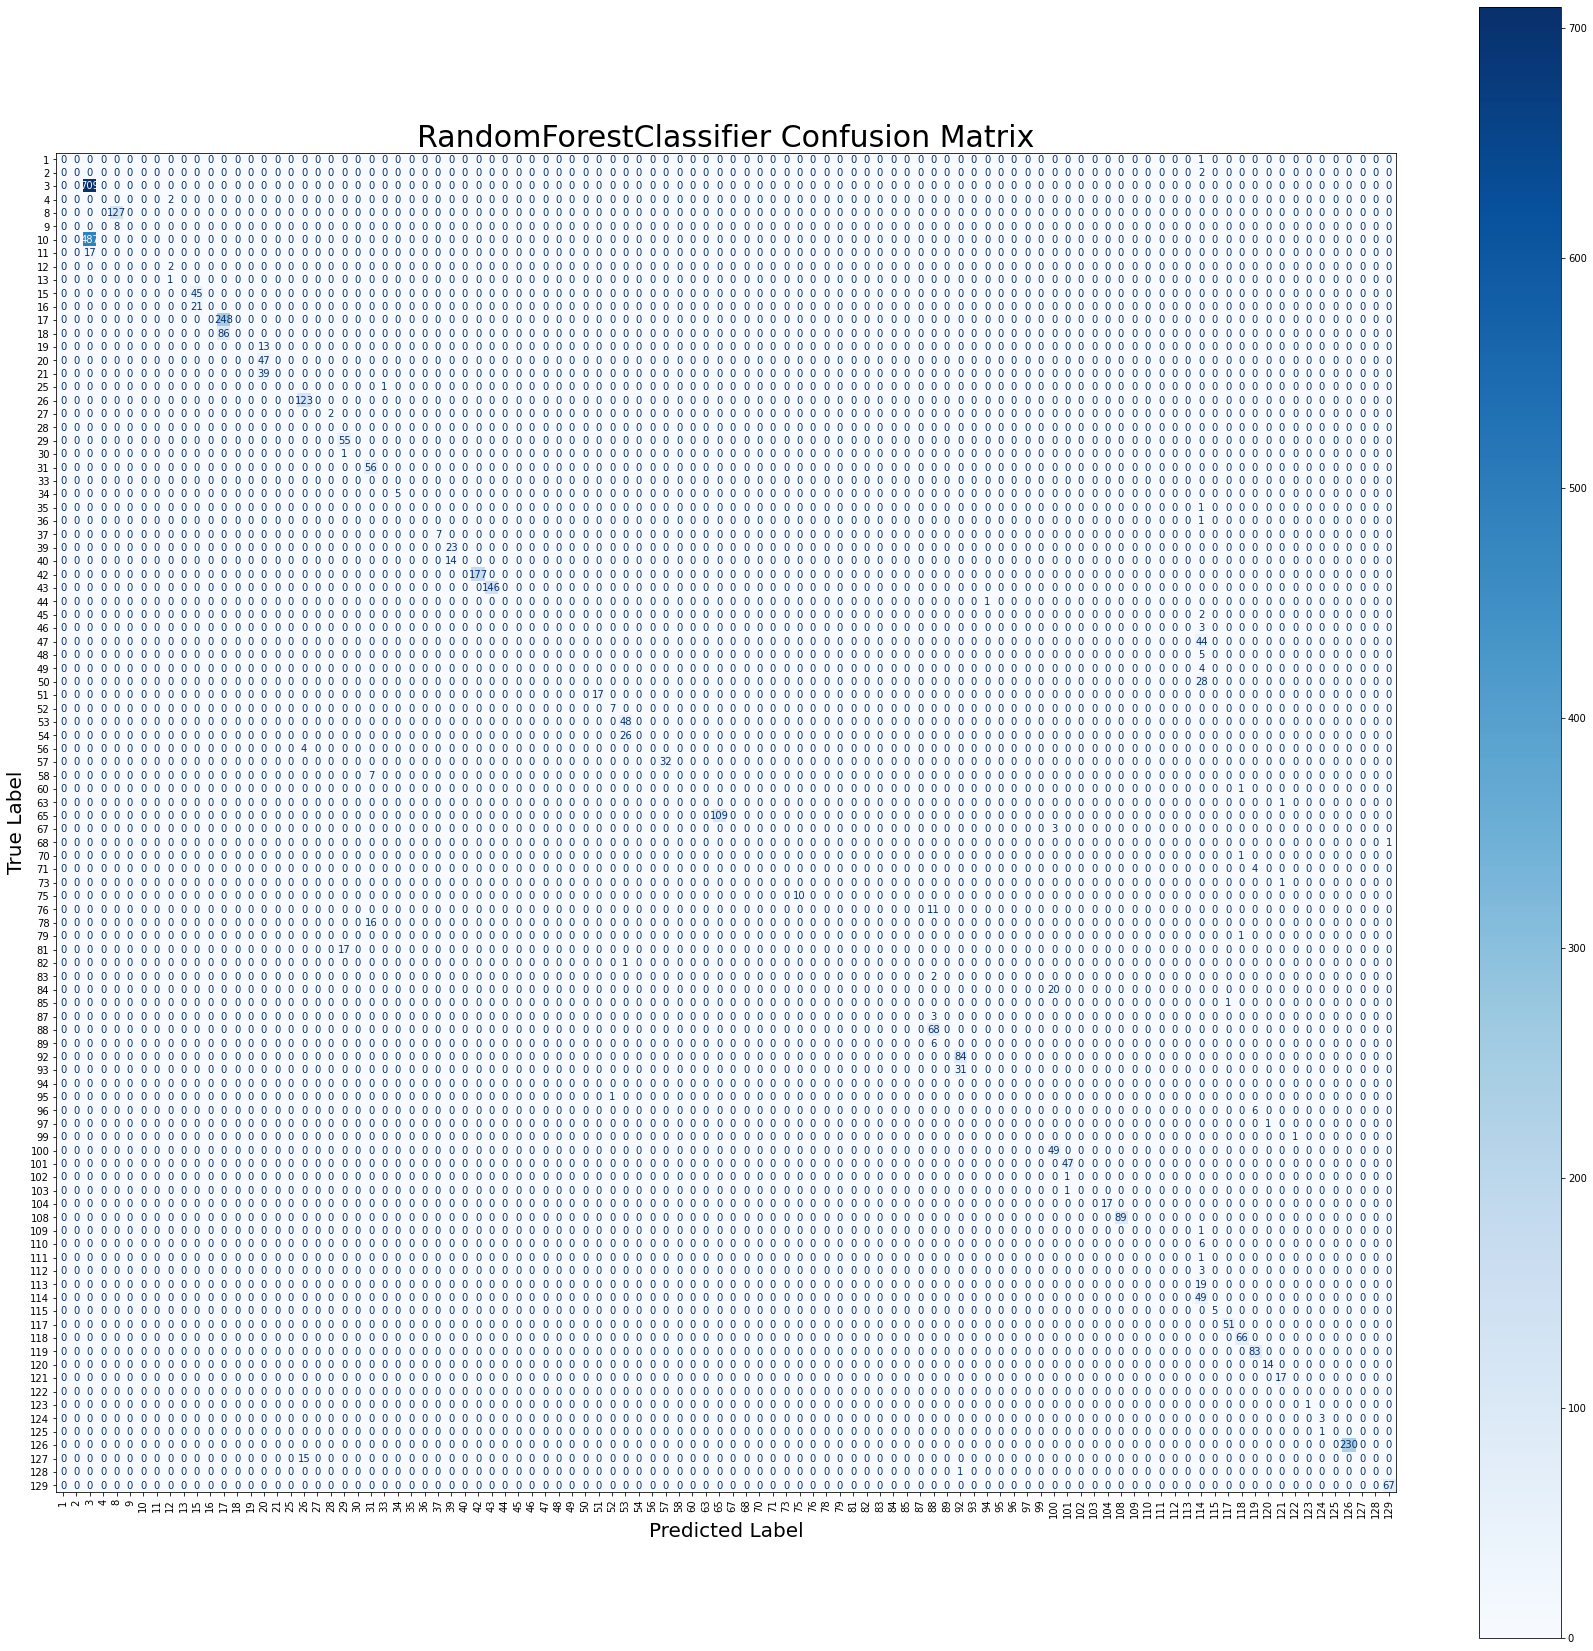

In [64]:
#plot confusion matrix
fig, ax = plt.subplots(figsize = (30, 30))
plot_confusion_matrix(RandomForestClassifier_model, X_test, y_test, cmap = plt.cm.Blues, ax = ax) 
plt.title('RandomForestClassifier Confusion Matrix', fontsize = 30)
plt.ylabel('True Label', fontsize = 20)
plt.xlabel('Predicted Label', fontsize = 20)
plt.xticks(rotation = 90);

#save
plt.savefig('RandomForestClassifier_cm.png')

In [65]:
#decode encoder
labels = encoder.inverse_transform(list(y_train) + list(y_test))
labels

array(['education longitudinal study', 'slosh model',
       'beginning postsecondary students longitudinal study', ...,
       'national education longitudinal study',
       'agricultural resource management survey', 'adni'], dtype='<U128')

In [66]:
#summary table
summary_table = pd.DataFrame({'Model': [],
                              'Accuracy': [],
                              'CV': [],
                              'Precision': [], 'Recall': [], 'F1': []})

In [67]:
summary_table.loc[0] = ['CLF RandomForestClassifier',
                        round(accuracy_score(y_test, RandomForestClassifier_yhat_test), 2),
                        round(RandomForestClassifier_CV, 2),
                        round(precision_score(y_test, RandomForestClassifier_yhat_test, average = 'macro'), 2), 
                        round(recall_score(y_test, RandomForestClassifier_yhat_test, average = 'macro'), 2), 
                        round(f1_score(y_test, RandomForestClassifier_yhat_test, average = 'macro'), 2)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1
0,CLF RandomForestClassifier,0.75,0.75,0.31,0.37,0.33


## Linear Support Vector Machine

In [68]:
from sklearn.linear_model import SGDClassifier

#create a tokenization a modelling pipeline
SGDClassifier_model = SGDClassifier(loss = 'hinge', #use Linear SVC(SVM) model when the parameter loss is set to 'hinge'
                                                      penalty = 'l2',
                                                      alpha = 1e-3,
                                                      random_state = 123,
                                                      max_iter = 5) #model the text

#fit the pipeline to the training data
SGDClassifier_model.fit(X_train, y_train) 

SGDClassifier(alpha=0.001, max_iter=5, random_state=123)

In [69]:
#predict 
SGDClassifier_yhat_train = SGDClassifier_model.predict(X_train)
SGDClassifier_yhat_test = SGDClassifier_model.predict(X_test)

#train accuracy 
SGDClassifier_train_accuracy = accuracy_score(y_train, SGDClassifier_yhat_train) * 100
print('Train accuracy: {0}'.format(SGDClassifier_train_accuracy))

#test accuracy 
SGDClassifier_test_accuracy = accuracy_score(y_test, SGDClassifier_yhat_test) * 100
print('Test accuracy: {0}'.format(SGDClassifier_test_accuracy))

Train accuracy: 74.45320447609359
Test accuracy: 74.42156114924994


In [70]:
#get cross validation
SGDClassifier_CV = cross_val_score(SGDClassifier_model, X_train, y_train,
                                   cv = k_fold, scoring = 'accuracy', n_jobs=-1).mean()
SGDClassifier_CV

0.7398268475273823

In [71]:
#get classification report
print('Model: Support Vector Machine', '\n', classification_report(y_test, SGDClassifier_yhat_test))

Model: Support Vector Machine 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.58      1.00      0.74       709
           4       0.00      0.00      0.00         2
           8       0.94      1.00      0.97       127
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00       487
          11       0.00      0.00      0.00        17
          12       0.40      1.00      0.57         2
          13       0.00      0.00      0.00         1
          15       0.68      1.00      0.81        45
          16       0.00      0.00      0.00        21
          17       0.74      1.00      0.85       248
          18       0.00      0.00      0.00        86
          19       0.00      0.00      0.00        13
          20       0.47      1.00      0.64        47
          21       0.00      0.00      0.00      

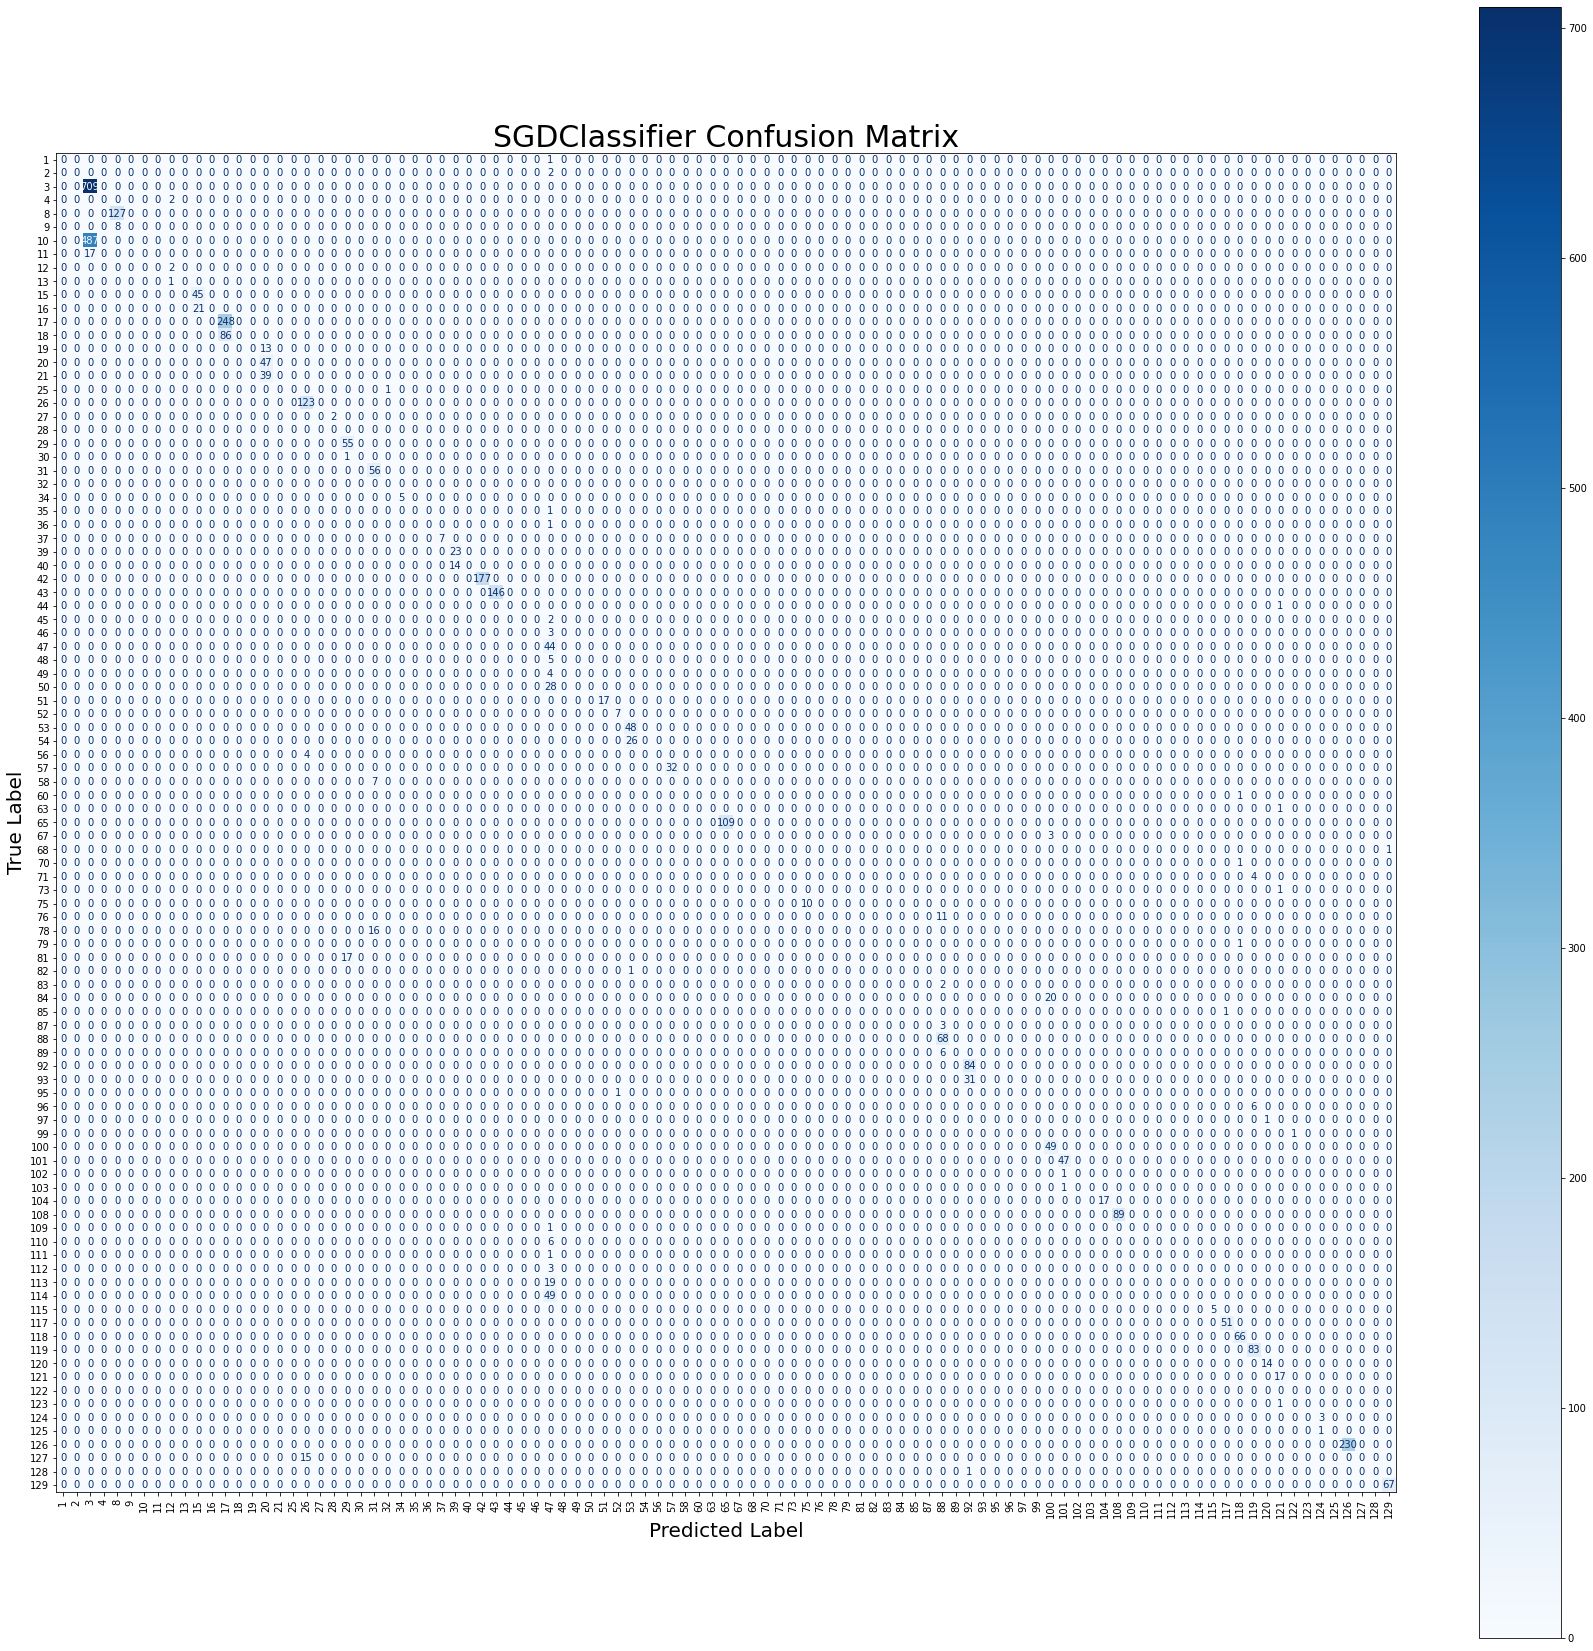

In [72]:
#plot confusion matrix
fig, ax = plt.subplots(figsize = (30, 30))
plot_confusion_matrix(SGDClassifier_model, X_test, y_test, cmap = plt.cm.Blues, ax = ax) 
plt.title('SGDClassifier Confusion Matrix', fontsize = 30)
plt.ylabel('True Label', fontsize = 20)
plt.xlabel('Predicted Label', fontsize = 20)
plt.xticks(rotation = 90);

#save
plt.savefig('SGDClassifier_cm.png')

In [73]:
summary_table.loc[1] = ['CLF Linear Support Vector Machine',
                        round(accuracy_score(y_test, SGDClassifier_yhat_test), 2),
                        round(SGDClassifier_CV, 2),
                        round(precision_score(y_test, SGDClassifier_yhat_test, average = 'macro'), 2), 
                        round(recall_score(y_test, SGDClassifier_yhat_test, average = 'macro'), 2), 
                        round(f1_score(y_test, SGDClassifier_yhat_test, average = 'macro'), 2)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1
0,CLF RandomForestClassifier,0.75,0.75,0.31,0.37,0.33
1,CLF Linear Support Vector Machine,0.74,0.74,0.30,0.36,0.33


# Naive Bayes MultinomialNB

In [74]:
from sklearn.naive_bayes import MultinomialNB

#create a tokenization a modelling pipeline
MultinomialNB_model = MultinomialNB() #model the text

#fit the pipeline to the training data
MultinomialNB_model.fit(X_train, y_train)

MultinomialNB()

In [75]:
#predict 
MultinomialNB_yhat_train = MultinomialNB_model.predict(X_train)
MultinomialNB_yhat_test = MultinomialNB_model.predict(X_test)

#train accuracy 
MultinomialNB_train_accuracy = accuracy_score(y_train, MultinomialNB_yhat_train) * 100
print('Train accuracy: {0}'.format(MultinomialNB_train_accuracy))

#test accuracy 
MultinomialNB_test_accuracy = accuracy_score(y_test, MultinomialNB_yhat_test) * 100
print('Test accuracy: {0}'.format(MultinomialNB_test_accuracy))

Train accuracy: 74.49771108850459
Test accuracy: 74.5486905669972


In [76]:
#get cross validation
MultinomialNB_CV = cross_val_score(MultinomialNB_model, X_train, y_train,
                                   cv = k_fold, scoring = 'accuracy', n_jobs=-1).mean()
MultinomialNB_CV

0.7446593094721436

In [77]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

#get classification report
print('Model: MultinomialNB', '\n', classification_report(y_test, MultinomialNB_yhat_test))

Model: MultinomialNB 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.58      1.00      0.74       709
           4       0.00      0.00      0.00         2
           8       0.94      1.00      0.97       127
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00       487
          11       0.00      0.00      0.00        17
          12       0.40      1.00      0.57         2
          13       0.00      0.00      0.00         1
          15       0.68      1.00      0.81        45
          16       0.00      0.00      0.00        21
          17       0.74      1.00      0.85       248
          18       0.00      0.00      0.00        86
          19       0.00      0.00      0.00        13
          20       0.47      1.00      0.64        47
          21       0.00      0.00      0.00        39
    

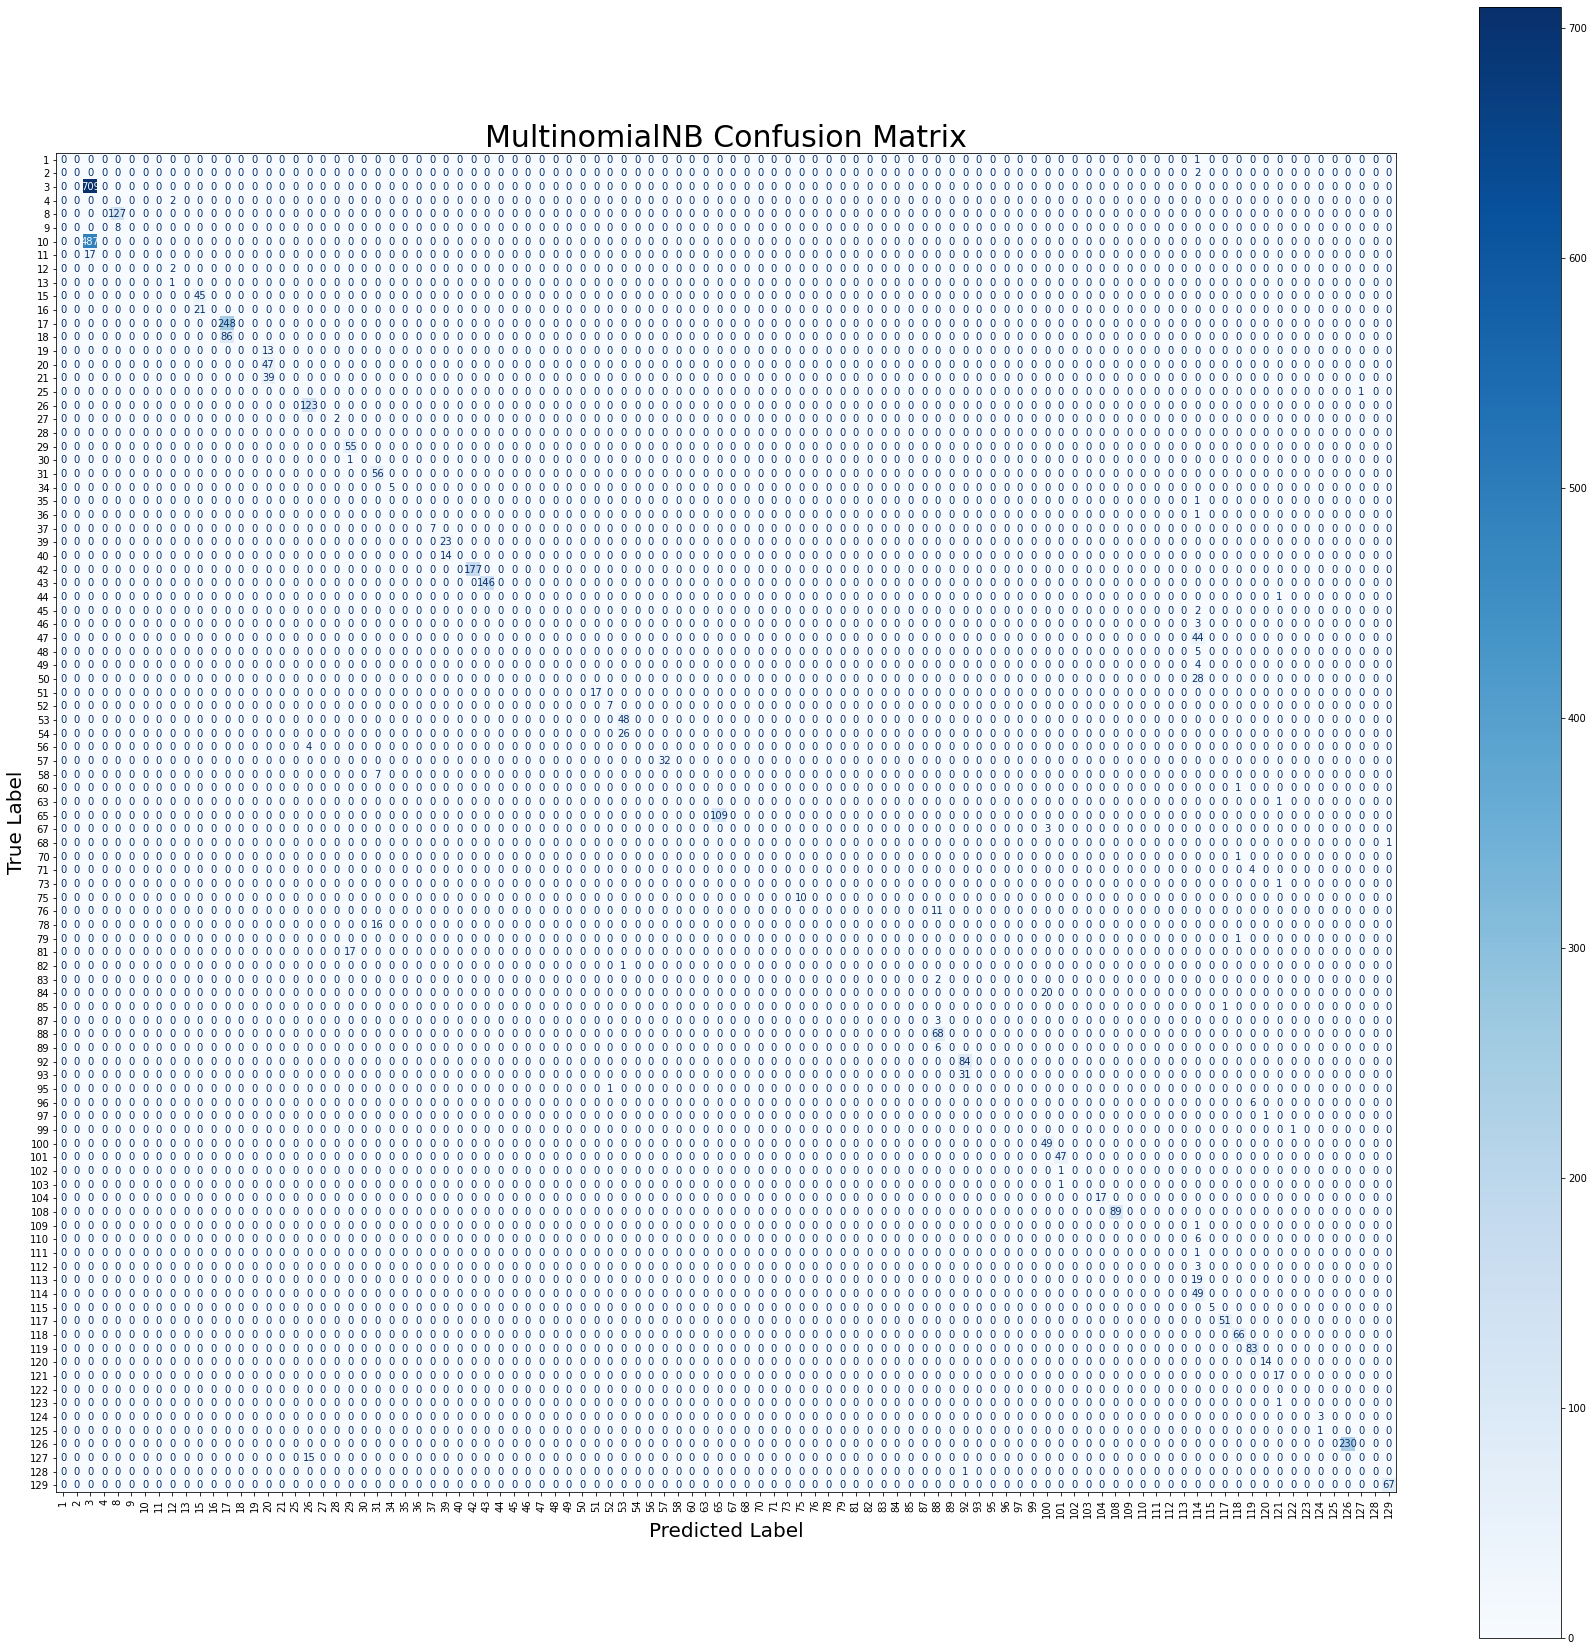

In [78]:
#plot confusion matrix
fig, ax = plt.subplots(figsize = (30, 30))
plot_confusion_matrix(MultinomialNB_model, X_test, y_test, cmap = plt.cm.Blues, ax = ax) 
plt.title('MultinomialNB Confusion Matrix', fontsize = 30)
plt.ylabel('True Label', fontsize = 20)
plt.xlabel('Predicted Label', fontsize = 20)
plt.xticks(rotation = 90);

#save
plt.savefig('MultinomialNB_cm.png')

In [79]:
#update summary table
summary_table.loc[2] = ['CLF MultinomialNB',
                        round(accuracy_score(y_test, MultinomialNB_yhat_test), 2),
                        round(MultinomialNB_CV, 2),
                        round(precision_score(y_test, MultinomialNB_yhat_test, average = 'macro'), 2), 
                        round(recall_score(y_test, MultinomialNB_yhat_test, average = 'macro'), 2), 
                        round(f1_score(y_test, MultinomialNB_yhat_test, average = 'macro'), 2)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1
0,CLF RandomForestClassifier,0.75,0.75,0.31,0.37,0.33
1,CLF Linear Support Vector Machine,0.74,0.74,0.30,0.36,0.33
2,CLF MultinomialNB,0.75,0.74,0.31,0.37,0.33


# INTERPRETATION